In [2]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import svm
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import data
data = pd.read_csv('/Users/mac/PycharmProjects/Container_Project/data/data:train_diabetes_health_indicators.csv')
data.head()

,Unnamed: 0,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,111866,2,1,1.0,1,32.0,1.0,0.0,1.0,1,...,1,0.0,2.0,15.0,0.0,0.0,1,7,6.0,6.0
1,206199,0,0,1.0,1,28.0,0.0,0.0,0.0,0,...,1,0.0,4.0,4.0,30.0,0.0,0,10,6.0,7.0
2,144211,0,0,1.0,1,24.0,1.0,0.0,0.0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,12,5.0,6.0
3,89872,2,1,1.0,1,38.0,0.0,0.0,0.0,1,...,1,0.0,3.0,0.0,0.0,0.0,1,7,6.0,8.0
4,34953,0,0,1.0,1,30.0,0.0,0.0,0.0,0,...,0,1.0,4.0,10.0,0.0,0.0,0,5,3.0,7.0


In [4]:
print(data.isnull().sum())
data = data.drop(columns=['Unnamed: 0'])
# Résumé statistique des données
print(data.describe())

# Informations sur les types de données et les valeurs manquantes
print(data.info())

Unnamed: 0              0
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
       Diabetes_012        HighBP      HighChol     CholCheck           BMI  \
count  47276.000000  47276.000000  47276.000000  47276.000000  47276.000000   
mean       0.305800      0.419325      0.401980      0.964337     28.939081   
std        0.703757      0.493454      0.490303      0.185450      6.562661   
min        0.000000      0.000000      0.000000      0.000000     12.0000

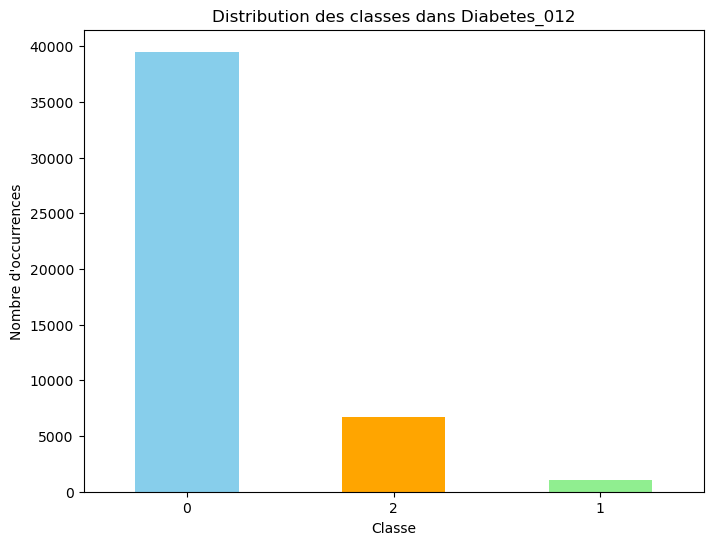

Proportions des classes :
 Diabetes_012
0    0.835688
2    0.141488
1    0.022823
Name: proportion, dtype: float64


In [5]:
data['Diabetes_012'] = data['Diabetes_012'].astype(int)
# Afficher la distribution des classes
class_distribution = data['Diabetes_012'].value_counts()

# Tracer un diagramme en barres pour visualiser la distribution
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color=['skyblue', 'orange', 'lightgreen'])
plt.title('Distribution des classes dans Diabetes_012')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=0)
plt.show()

# Afficher les proportions des classes
class_proportions = data['Diabetes_012'].value_counts(normalize=True)
print('Proportions des classes :\n', class_proportions)

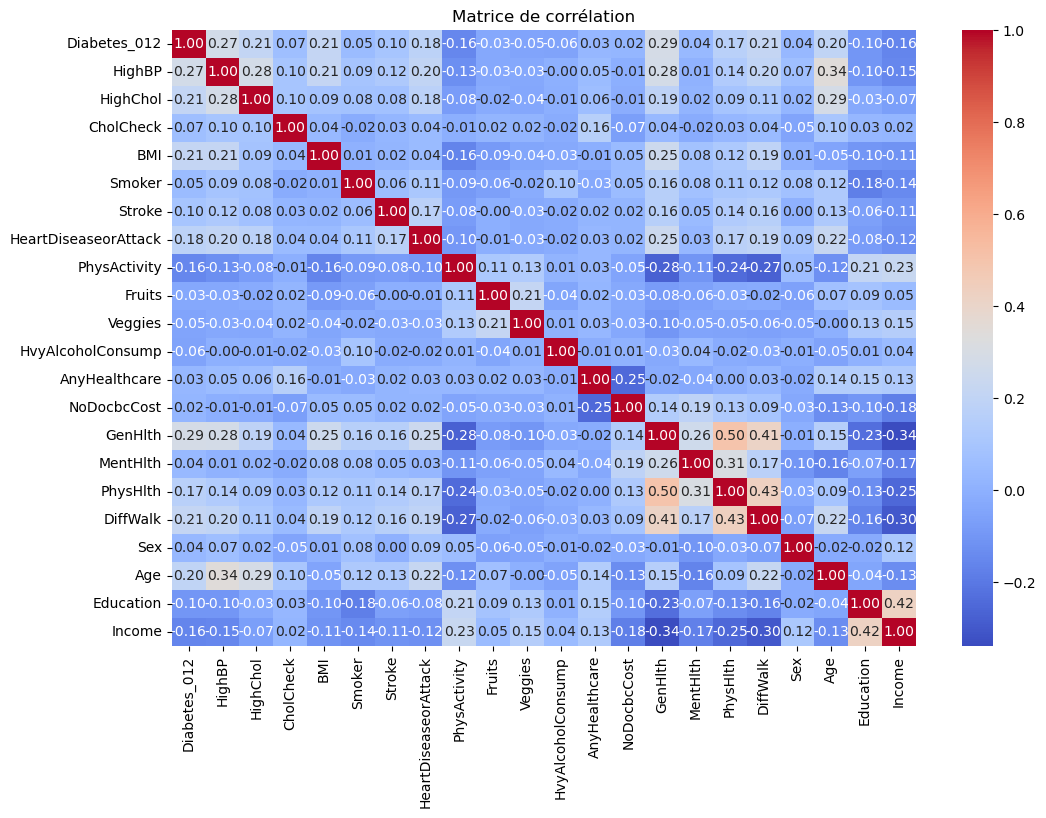

In [6]:
# Matrice de corrélation
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()

In [7]:
# Feature Scaling
numerical_cols = ['BMI', 'Age', 'Education', 'Income', 'GenHlth', 'MentHlth', 'PhysHlth']
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Séparer les features et la cible
X = data.drop('Diabetes_012', axis=1)
y = data['Diabetes_012']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# SVM rbf Kernel
model = svm.SVC(kernel='rbf')
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print(accuracy_score(y_train, y_train_pred))


In [ ]:
y_pred = model.predict(X_test)

# Evaluate model predictions
print(f'Classification_report:\n {classification_report(y_test,y_pred)}')

In [8]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler()
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)


In [9]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', class_weight='balanced')
svm_model.fit(X_resampled, y_resampled)

SVC(class_weight='balanced')

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 'scale', 'auto']}
grid_search = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, cv=5)
grid_search.fit(X_resampled, y_resampled)


# Get the best parameters
best_params = grid_search.best_params_

# Create an SVM model with the best parameters
best_svm_model = SVC(kernel='rbf', class_weight='balanced', C=best_params['C'], gamma=best_params['gamma'])
best_svm_model.fit(X_resampled, y_resampled)

# Evaluate model predictions
y_pred = best_svm_model.predict(X_test)
print(f'Classification_report:\n {classification_report(y_test, y_pred)}')


In [10]:
# Export model
pickle.dump(svm_model, open("svm_model.pkl", "wb"))